In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

In [3]:
X, y = data[:, 1:], data[:, 0]

In [4]:
X.shape

(19999, 784)

In [5]:
model = PCA(n_components=100)

In [6]:
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
model.components_.shape

(100, 784)

In [8]:
X_mod = model.transform(X)

In [9]:
X_mod.shape

(19999, 100)

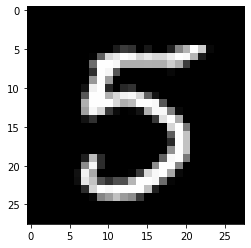

In [10]:
plt.imshow(X[0].reshape(28, 28), cmap="gray")

In [13]:
#plt.imshow(X_mod[0].reshape(28, 28), cmap="gray")

In [14]:
X_mod.shape

(19999, 100)

In [15]:
model.components_.shape

(100, 784)

In [16]:
X_rev = np.dot(X_mod, model.components_)

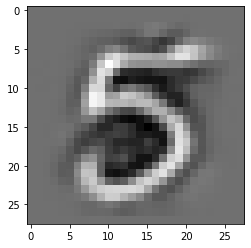

In [17]:
plt.imshow(X_rev[0].reshape(28, 28), cmap="gray")

In [18]:
model = PCA(n_components=2)

In [19]:
X_mod = model.fit_transform(X)

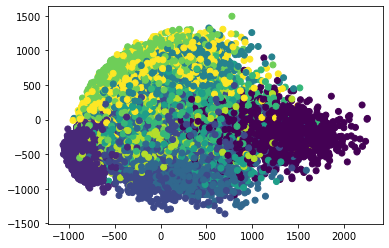

In [20]:
plt.scatter(X_mod[:, 0], X_mod[:, 1], c=y)

In [21]:
indices = y < 3

In [22]:
X_select = X_mod[indices]
y_select = y[indices]

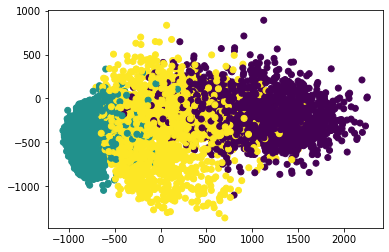

In [23]:
plt.scatter(X_select[:, 0], X_select[:, 1], c=y_select)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_select, y_select, test_size=0.33, random_state=42)

In [26]:
m2 = KNeighborsClassifier()

In [27]:
m2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
m2.score(X_test, y_test)

0.8518337408312958

In [29]:
model.components_.shape

(2, 784)